Dataset Link: https://drive.google.com/drive/folders/1LCM01Tu2v1kItRL_fW66RDEN47ftVloz?usp=drive_link



# 1. Import the required libraries 

In [1]:
import os
import path


import numpy as np

import json


from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score


import tensorflow as tf
from tensorflow import keras

from subprocess import check_output
from skimage.transform import resize

from tqdm.notebook import tqdm


from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score



# 2. Data Acquisition  


In [2]:
##---------Type the code below this line------------------##
#Common parameters 

img_height,img_width=150,150


no_of_classes=6

# Input data files are available in the "../Data/" directory.
in_folder = os.path.join('.',  'data')

file_count = []

for fld in os.listdir(in_folder):   
    crt = os.path.join(in_folder, fld)    
    image_count = len(os.listdir(crt))     
    file_count.append(image_count)      
    print(f'{crt} contains {image_count} images')

seed_train_validation = 1 # 1 Must be same for train_ds and val_ds
shuffle_value = True #True
validation_split = 0.2


### SLitting Training Data Set to Training as 
train_ds  = tf.keras.preprocessing.image_dataset_from_directory(in_folder,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=min(file_count),
                                                               validation_split = validation_split,
                                                               subset = "training",
                                                               seed = seed_train_validation,
                                                               #color_mode = 'grayscale',
                                                               shuffle = shuffle_value )

validation_ds  = tf.keras.preprocessing.image_dataset_from_directory(in_folder,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=min(file_count),
                                                               validation_split = validation_split,
                                                               subset = "validation",
                                                               seed = seed_train_validation,
                                                               #color_mode = 'grayscale',
                                                               shuffle = shuffle_value )

train_ds_no_images = len(train_ds.file_paths)
validation_ds_no_images = len(validation_ds.file_paths)
batch_size =  min(file_count)
class_names = train_ds.class_names




.\data\Building contains 499 images
.\data\Forest contains 2744 images
.\data\Glacier contains 499 images
.\data\Mountains contains 499 images
.\data\Sea contains 499 images
.\data\Streets contains 499 images
Found 5239 files belonging to 6 classes.
Using 4192 files for training.
Found 5239 files belonging to 6 classes.
Using 1047 files for validation.


## 2.1 Data Demo

1. Size of the dataset
2. Plot Distribution of the categories of the target / label.


Min file count =   499
train ds file count =   4192
validation ds file count =   1047
class_names =  ['Building', 'Forest', 'Glacier', 'Mountains', 'Sea', 'Streets']


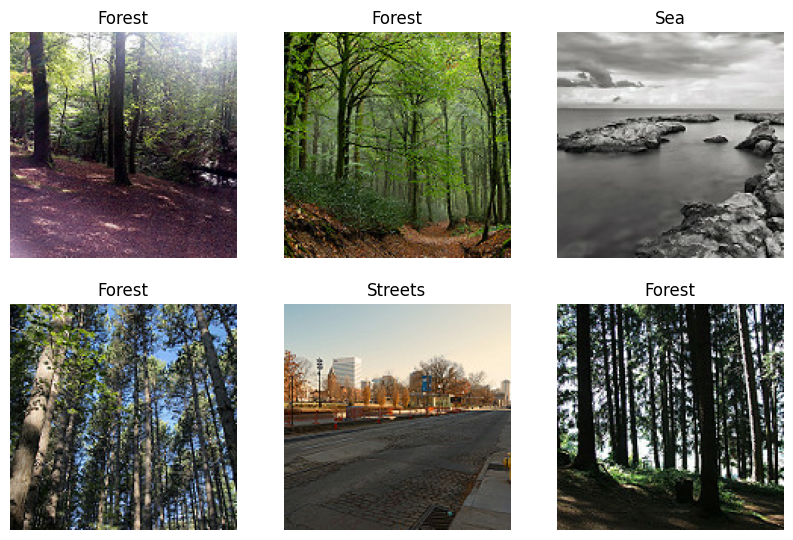

In [3]:
print('Min file count =  ',batch_size)
print('train ds file count =  ',train_ds_no_images)
print('validation ds file count =  ',validation_ds_no_images)
print('class_names = ', class_names)

#Visualization 
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for var in range(6): # printing first six files 
        ax = plt.subplot(3, 3, var + 1)
        plt.imshow(images[var].numpy().astype("uint8"))
        plt.title(class_names[labels[var]])
        plt.axis("off")
    plt.show()

# 3. Data Preparation 

## 3.1 Split the data into training set and testing set

## 3.2 Preprocessing

* Extract the features from the images and concatenate them to create a single for the every images.




In [4]:
##---------Type the answer below this line------------------##
def calculate_hog_features(ds, total_samples,batch_size):
    hog_images = []
    hog_features = []
    hog_labels =[]
    k= total_samples/batch_size 
    if (total_samples % batch_size != 0):
        k +=1   
    print('no_of_iterations =', k)
    j=int(k)
    for images, labels in ds.take(j):

        if(total_samples >=batch_size):
            l=batch_size
        else:            
            l=total_samples
        var = 0 
        print('no_of_images_left =', total_samples)
        total_samples -= batch_size
        for var in tqdm(range(l), total=l):
            data = images[var].numpy().astype("uint8")
            resized_img = resize(data, (128,64))  # hog needs this 2:1 ratio
            
            #creating hog features 
            fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis=2)  
            
            hog_images.append(hog_image)
            hog_features.append(fd)
            hog_labels.append(labels[var])
    return hog_images, hog_features ,hog_labels


# 4.1 Model Building 
* Use classical machine learning algorithm  SVM 

In [5]:
##---------Type the code below this line------------------##
#print(hog_features)
#print(hog_features[1])
#print(len(hog_features[0]))
#print(labels)

#hi ,hf,hl = calculate_hog_features(train_ds,train_ds_no_images,batch_size)
hi ,hf,hl = calculate_hog_features(ds=train_ds,total_samples=train_ds_no_images,batch_size=batch_size)

#y_train = labels.numpy().astype("uint8")
y_train = np.array(hl)
x_train = np.array(hf)
print(len(y_train))

model = svm.SVC()
model.fit(x_train,y_train)



no_of_iterations = 9.400801603206412
no_of_images_left = 4192


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 3693


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 3194


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 2695


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 2196


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 1697


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 1198


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 699


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 200


  0%|          | 0/200 [00:00<?, ?it/s]

4192


SVC()

## 4.2 Validation matrix

Print the model accuracy and F1 Score


In [6]:
##---------Type the answer below this line------------------##
hi ,hf,hl = calculate_hog_features(ds=validation_ds,total_samples=validation_ds_no_images,batch_size=batch_size)

#y_train = labels.numpy().astype("uint8")
y_test = np.array(hl)
x_test = np.array(hf)
print(len(y_test))

y_pred = model.predict(x_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))



no_of_iterations = 3.0981963927855714
no_of_images_left = 1047


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 548


  0%|          | 0/499 [00:00<?, ?it/s]

no_of_images_left = 49


  0%|          | 0/49 [00:00<?, ?it/s]

1047
Accuracy: 0.8042024832855779


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.94      0.97      0.96       545
           2       0.42      0.47      0.45        87
           3       0.54      0.48      0.51       100
           4       0.64      0.63      0.63       100
           5       0.84      0.77      0.81       113

    accuracy                           0.80      1047
   macro avg       0.69      0.67      0.68      1047
weighted avg       0.80      0.80      0.80      1047



# 5.1 Model Inference


Found 6 files belonging to 6 classes.
no_of_iterations = 1.0
no_of_images_left = 6


  0%|          | 0/6 [00:00<?, ?it/s]

6
[1 3 5 0 2 4]
[1 3 5 0 2 4]


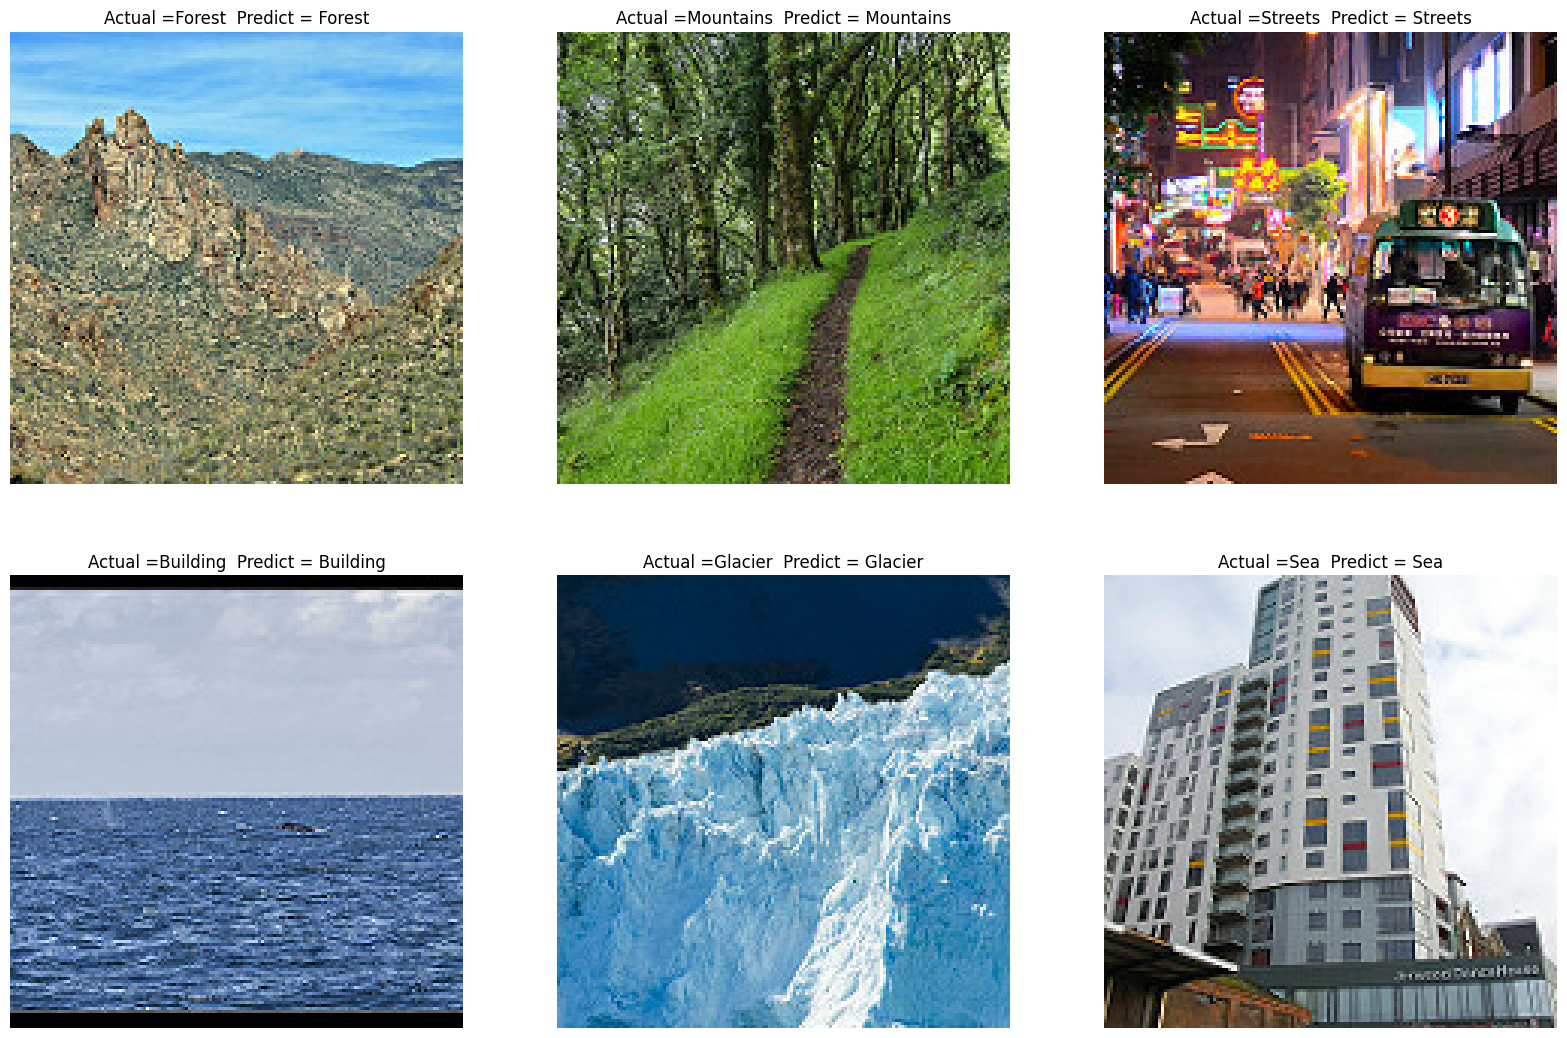

Accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [7]:
##---------Type the code below this line------------------##
# test  data files are available in the "../test-data/" directory.
test_folder = os.path.join('.',  'test-data')


### SpLitting Training Data Set to Training as 
test_ds  = tf.keras.preprocessing.image_dataset_from_directory(test_folder,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               image_size=(img_height, img_width),
                                                               shuffle = True)
test_ds_no_images = len(test_ds.file_paths)
hi ,hf,hl = calculate_hog_features(ds=test_ds,total_samples=test_ds_no_images,batch_size=test_ds_no_images)

#y_train = labels.numpy().astype("uint8")
y_test = np.array(hl)
x_test = np.array(hf)
print(len(y_test))

y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

#Visualization 
var = 0
for images, labels in test_ds.take(1):
    plt.figure(figsize=(20, 20))
    for var in range(6): # printing first six files 
        ax = plt.subplot(3, 3, var + 1)
        plt.imshow(images[var].numpy().astype("uint8"))
        plt.title('Actual ='+ class_names[y_test[var]] + '  '+'Predict = '  + class_names[y_pred[var]])
        plt.axis("off")
    plt.show()
    

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
